In [1]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import names

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# .map('{:,.2f}'.format) - - - for big numbers

In [2]:
salaries_df = pd.read_csv('/Users/jakemeissner/Documents/datasets/Salaries.csv')
salaries_df.head()

/Users/jakemeissner/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
salaries_df.sort_values('TotalPay', ascending=False)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106781,106782,Su-Wen McManus,Secretary 2,NaN,0.0,0.0,7959.18,0.00,7959.18,2013,NaN,San Francisco,NaN
106780,106781,Kimberly F Johnson,Transit Operator,NaN,0.0,0.0,7959.18,0.00,7959.18,2013,NaN,San Francisco,NaN
106779,106780,Jack L Brodnax Jr,Junior Management Assistant,NaN,0.0,0.0,7959.18,0.00,7959.18,2013,NaN,San Francisco,NaN
106778,106779,Ronald R Orge,Parking Control Officer,NaN,0.0,0.0,7959.18,0.00,7959.18,2013,NaN,San Francisco,NaN


Text(0, 0.5, 'Total Pay ($)')

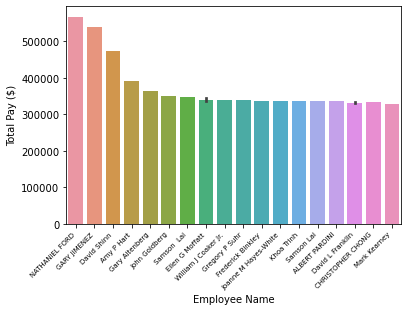

In [4]:
plt.figure(figsize=(6,4))

sns.barplot(x = salaries_df.sort_values('TotalPay', ascending=False)['EmployeeName'][:20], 
y = salaries_df.sort_values('TotalPay', ascending=False)['TotalPay'][:20], data=salaries_df)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small'  
)

plt.xlabel('Employee Name')
plt.ylabel('Total Pay ($)')

In [5]:
salaries_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [6]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB
